<span style="font-size:10pt">Robotics & AI workshop @ PPU – June 2022 – Jean-Luc Charles (Jean-Luc.charles@ensam.eu) – CC BY-SA 4.0 – v1.0</span>

# Load & operate a trained Dense Neural Network (DNN) for the classification of handwritten digits images

<div class="alert alert-block alert-danger">
<span style="color:brown;font-family:arial;font-size:14pt"> 
It is important to use a <span style="font-weight:bold;">Python Virtual Environment</span> (PVE) for main Python projects: a PVE makes it possible to control for each project the versions of the Python interpreter and the "sensitive" modules (like tensorflow).</span></div>

All the notebooks in this directory must be loaded into a `jupyter notebook` launched in the PVE <b><span style="color: rgb(200, 151, 102);" >pyml</span></b> specially created for the workshop.<br>
They must be worked in this order:
- `ML1_MNIST.ipynb`: check that the <b><span style="color: rgb(200, 151, 102);">pyml</span></b> EVP is fully operationnal, load and use the data from the MNIST database (images and labels).
- `ML2_DNN.ipynb`: build a Dense Neural Network, train it with data from the MNIST and evaluate its performance.
- `ML3_DNN_ipynb`: re-load a trained DNN and evaluate its performnce with MNIST test data.
- `ML4_CNN.ipynb`: build a Convolutional Neural Network, train it with the MNIST database, ebvaluate its performance and use it with test data.

***Targeted learning objectives:***
- Know how to reload the structure and the weights of a previously trained DNNN.
- Know how to exploit the reloaded trained DNN with the `predict` method.
- Know how to display the matrix of confusion.

In [ ]:
import os
print(f"Working directory: {os.getcwd()}")

## 1 - Check Python modules
The **keras** module which allows high-level manipulation of **tensorflow** objects is integrated in the **tensorflow** (tf) module since version 2. <br>
The **tf.keras** module documentation to consult for this APP is here: [www.tensorflow.org/api_docs/python/tf/keras](https://www.tensorflow.org/api_docs/python/tf/keras).

Delete the (numerous) warning messages from the **tensorflow** module:

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sys, cv2
import matplotlib.pyplot as plt
print(f"Python    : {sys.version.split()[0]}")
print(f"tensorflow: {tf.__version__} incluant keras {keras.__version__}")
print(f"numpy     : {np.__version__}")
print(f"OpenCV    : {cv2.__version__}")

Python    : 3.6.12
tensorflow: 2.6.0 incluant keras 2.6.0
numpy     : 1.19.2
OpenCV    : 4.6.0


Embedding matplotlib plots in the notebook:

In [3]:
%matplotlib inline

# Reminder of the structure of the DNN

In this notebook we will build a **Dense Neural Network** , with:
- an **input layer** of 784 values between 0 and 1 (the pixels of the MNIST 28 $\times$ 28 images flattened to a normalized vector of 784 `float` numbers),
- a **hidden layer** of 784 neurons with the `relu` activation function,
- an **output layer** of 10 neurons for the classification of images into 10 classes associated with the digits {0,1,2...9}, using the `softmax` activation function adapted to classification problems.
<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/archiReseau.png" alt="archiReseau.png" style="width: 900px;"><br> 
    [crédit image : JLC]
</p>

## Work to do
### 1 - Load and pre-process the MNIST test data set<br>2 - Reload the trained DNN structure and its weights<br>3 - Exploit the trained DNN with predict method<br>4 - Display the matrix of confusion

## 1 - Load and pre-process MNIST test data set

The work of loading MNIST images has been explained in the *notebook* `ML1_MNIST.ipynb`:

In [4]:
# Load the MNIST data set:
(im_train, lab_train), (im_test, lab_test) = tf.keras.datasets.mnist.load_data()

# Define parameters :
nb_im_test  = im_test.shape[0]     # number of test images
nb_pixel    = im_test[0].size      # number of pixels par iamge
nb_class   = len(set(lab_test))   # number of classes (10 digits from 0 to 9)

print(f"{nb_im_test} test images")
print(f"{nb_pixel} pixels in each image")
print(f"{nb_class} classes (the digits from 0 to 9)")

# Flatten and normalize matrixes:
x_test  = im_test.reshape(nb_im_test, nb_pixel)/im_test.max()

# 'one-hot' encoding of the labels:
from tensorflow.keras.utils import to_categorical
y_test  = to_categorical(lab_test)

10000 test images
784 pixels in each image
10 classes (the digits from 0 to 9)


## 2 - Reload the trained network structure and weights

The `load_model` method of the `tf.keras.models` class reloads **the structure** and **the weights** of a trained network.<br>
So you can build and relod the DNN trained in the previous notebook:

In [9]:
import os

# define the path for the DNN trained in the previous notebook:
model_path = os.path.join('Correction/models', 'trained1_model')

# load the DNN structure and weights:
model = tf.keras.models.load_model(model_path)

## 3 - Exploiting the trained network: `predict` method

The `predict` method is used to compute the DNN inferences for one or more inputs (see the `predict` method in the page 
[tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#predict)).

The cell below shows an example:

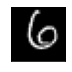

DNN inférence for the test image #100 :
[5.5345422e-06 2.8186053e-08 2.2714516e-06 2.2498172e-08 8.6463405e-07
 7.8480080e-06 9.9998188e-01 2.2777760e-07 1.2931459e-06 2.2119014e-08]


In [10]:
i = 100  # number of the test image 

# display the image:
from utils.tools import plot_images
plot_images(im_test,i,1,1) ; plt.show()

# compute the trained DNN inference inférence for tes test image:
rep = model.predict(x_test[i:i+1])      # Warning: x must be an array of matrixes, not a simple matrix
                                        # => x[i] does not work!

print(f"DNN inférence for the test image #{i} :\n{rep[0]}")

to make the output of the network more readable, we can limit the display of the numpy array to 2 decimal places:

In [11]:
with np.printoptions(formatter={'float':'{:.2f}'.format}):    
    print(f"DNN inférence for the test image #{i} rounded to 2 digits: {rep[0]}")

DNN inférence for the test image #100 rounded to 2 digits: [0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00]


The `argmax` method of the *ndarray* arrays of *numpy* gives the rank of the maximum value:

In [12]:
print(f"Predicted label is rep[0].argmax(): {rep[0].argmax()}")
print(f"True label of the test image #{i} : {lab_test[i]}")

Predicted label is rep[0].argmax(): 6
True label of the test image #100 : 6


### Usefulness of numpy's `argmax` method to decode the array of *one-hot* vectors returned by `predict`

When you compute inferences of the DNN for the images of the `x_test` array for example, you get an array of *one-hot* vectors:

In [13]:
results = model.predict(x_test)
print("shape of the 'results' ndarray:", results.shape)
print("Example of display of vectors in the 'result' ndarray:")
with np.printoptions(formatter={'float':'{:.2f}'.format}): 
    print("\tresults[0]  :", results[0])
    print("\tresults[-1] :", results[-1])

shape of the 'results' ndarray: (10000, 10)
Example of display of vectors in the 'result' ndarray:
	results[0]  : [0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00]
	results[-1] : [0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00]


With the expression `results.argmax(axe=-1)`, you get the array of the `argmax` of each vector $\leadsto$ it is the array of the digits classified by the network:

In [14]:
inferences = results.argmax(axis=-1)
print(f"inferences.shape: {inferences.shape}, inferences.dtype: {inferences.dtype}")
print(f"Content of 'inferences': {inferences}")

inferences.shape: (10000,), inferences.dtype: int64
Content of 'inferences': [7 2 1 ... 4 5 6]


We can compare `inferences` and `lab_test` with the `==` operator (this makes sense with the *ndarray* of the *numpy* module):

In [15]:
inferences == lab_test

array([ True,  True,  True, ...,  True,  True,  True])

by counting the number of `True` we get the number of correct inferences:

In [16]:
inference_ok = (inferences == lab_test)
print(f"number of true inferences: {inference_ok.sum()} over {nb_im_test} test images")

precision = inference_ok.sum()/nb_im_test*100
print(f"precision of the trained DNN: {precision:.1f} %")

number of true inferences: 9826 over 10000 test images
precision of the trained DNN: 98.3 %


## 4 - Show Confusion Matrix

The `show_cm` function from the `utils.tools` module displays the **confusion matrix** to visualize:
- on the diagonal: the correct inferences of the DNN, with the number of correct answers in each box
- off diagonal: the DNN errors, with in each box the number of occurrences.

In [17]:
from utils.tools import show_cm
help(show_cm)

Help on function show_cm in module utils.tools:

show_cm(true, results, classes)
    true  : the actual labels 
    results : the labels computed by the trained network (one-hot format)
    classes : list of possible label values



Call the `show_cm` function with arguments `lab_test`, `results` and the list of classes to display the confusion matrix:

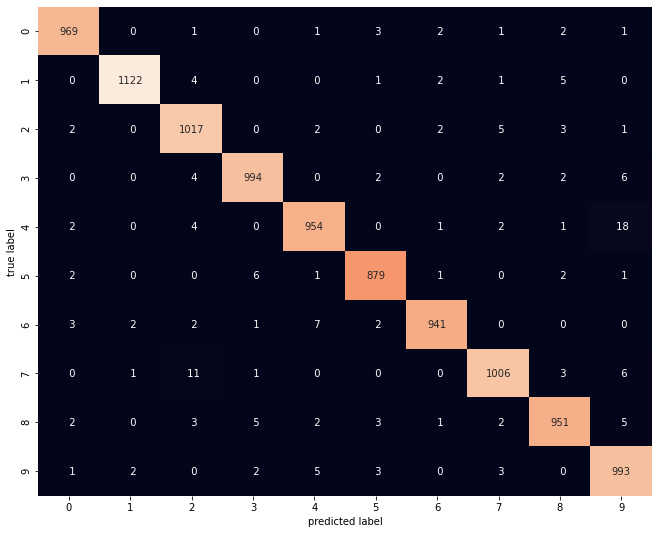

In [19]:
show_cm(lab_test, results, range(nb_class))

### Further work:
You can now load the `MLC_CNN_cont.ipynb` notebook to learn to learn how to build and operate a convolutional neural network.

# Other interesting resources... videos:

In [1]:
%%HTML
<iframe src="https://www.youtube.com/embed/aircAruvnKk" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [2]:
%%HTML
<iframe src="https://www.youtube.com/embed/IHZwWFHWa-w" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [3]:
%%HTML
<iframe src="https://www.youtube.com/embed/Ilg3gGewQ5U" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>